In [1]:
from ase.io import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path2dump = '/home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj'
atoms = read(path2dump, index=0, format='lammps-dump-text')

In [3]:
coord = atoms.get_positions()
cell = atoms.get_cell()

(0.0, 95.02499999999999)

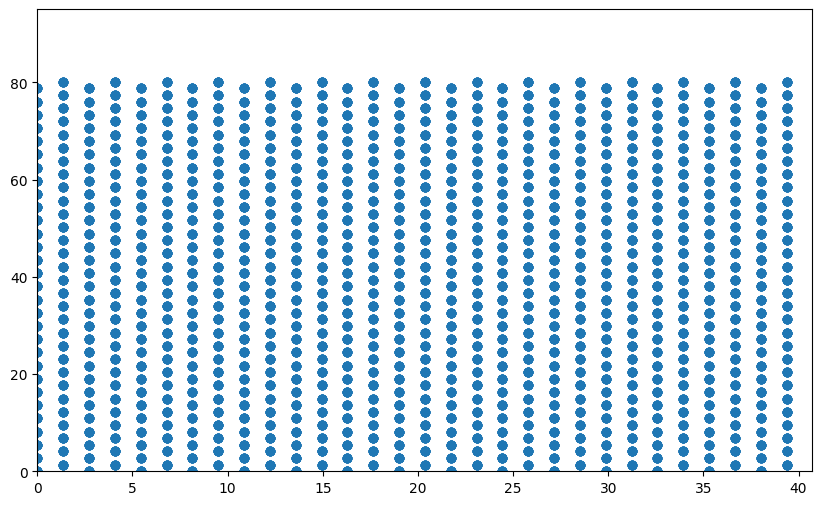

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(coord[:, 0], coord[:, 2])
ax.set_xlim(0, cell[0].max())
ax.set_ylim(0, cell[2].max())

In [24]:
from ovito.io import import_file
from ovito.io.ase import ovito_to_ase

# Import a sequence of files.
pipeline = import_file(path2dump)

ase_atoms_list = []

# Loop over all frames of the sequence.
for frame_index in range(pipeline.source.num_frames):

    # Calling FileSource.compute() loads the requested frame
    # from the sequence into memory and returns the data as a new
    # DataCollection:
    data = pipeline.source.compute(frame_index)
    ase_atoms = ovito_to_ase(data)
    ase_atoms_list.append(ase_atoms)

    # The source path and the index of the current frame
    # are attached as attributes to the data collection:
    print('Frame source:', data.attributes['SourceFile'])
    print('Frame index:', data.attributes['SourceFrame'])

Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 0
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 1
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 2
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 3
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 4
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 5
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 6
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 7
Frame source: /home/y1u0d2/result/lammps/scripts

Atoms(symbols='H6750', pbc=[True, True, False], cell=[40.724999999999994, 40.724999999999994, 95.02499999999999], Particle Identifier=...)